In [1]:
import pandas as pd
import numpy as np

In [2]:
l_parse_date_cols = ['dt_prediction_date', 'dt_target_date', 'dt_flight_date']
l_target_cols = ['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt', 'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt', 'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt', 'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',  'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt', 'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',  'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt', 'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt', 'num_pax_240plus_mins_before_sdt']


In [17]:
df1= pd.read_csv(r"C:\Users\piush\Desktop\Dataset\data_20161116\FullSet.csv")
#train = train.set_index('id')
#test = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\data_20161116\test.csv")
#test = test.set_index('id')

In [18]:
test2 = df1[pd.isnull(df1).any(axis=1)]

In [19]:
target = df1[l_target_cols]

In [20]:
df3 = df1.drop(l_target_cols,axis = 1)
test2 = test2.drop(l_target_cols,axis = 1) 

In [21]:
# Concatenate the 2 data sets
df = df3.append(test2, ignore_index = True)

In [22]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['cat_case_type'] = class_le.fit_transform(df['cat_case_type'].values)
df['cat_s_plane_capacity'] = class_le.fit_transform(df['cat_s_plane_capacity'].values)
df['dt_flight_date'] = class_le.fit_transform(df['dt_flight_date'].values)
df['dt_prediction_date'] = class_le.fit_transform(df['dt_prediction_date'].values)
df['dt_target_date'] = class_le.fit_transform(df['dt_target_date'].values)
df['s_model_type'] = class_le.fit_transform(df['s_model_type'].values)

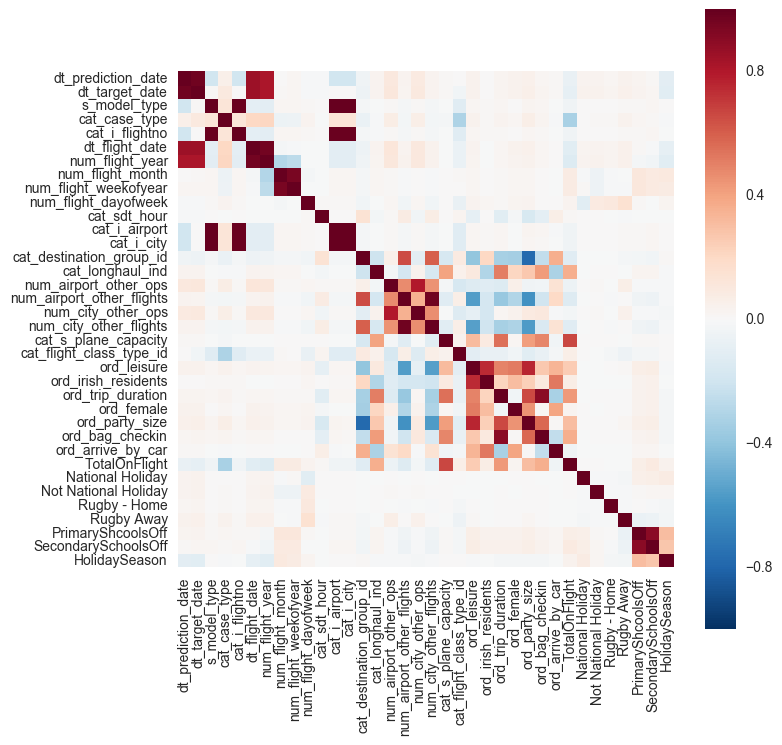

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=1, square=True)

###### Selecting meaningful features

In [24]:
X = df3[:df1.shape[0]]
test1 = df3[df1.shape[0]:]

In [25]:
print (str(len(X))+" rows for training set")
print (str(len(test1))+" rows for test set")
print (str(len(target))+" rows for target")

136194 rows for training set
0 rows for test set
136194 rows for target


In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [13]:
feature_imp = pd.DataFrame(model.feature_importances_, index=df.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20

Index(['cat_s_plane_capacity', 'dt_flight_date', 'num_flight_weekofyear',
       'cat_sdt_hour', 'cat_longhaul_ind', 'num_flight_dayofweek',
       'dt_target_date', 'dt_prediction_date', 'cat_i_flightno',
       'num_flight_month', 'num_airport_other_flights',
       'num_city_other_flights', 'cat_i_airport', 'cat_i_city', 'ord_leisure',
       'cat_flight_class_type_id', 'num_city_other_ops', 'cat_case_type',
       'num_airport_other_ops', 'ord_irish_residents'],
      dtype='object')

 1) cat_s_plane_capacity           0.192438
 2) dt_flight_date                 0.142748
 3) num_flight_weekofyear          0.089488
 4) cat_sdt_hour                   0.088610
 5) cat_longhaul_ind               0.088054
 6) num_flight_dayofweek           0.061815
 7) dt_target_date                 0.041099
 8) dt_prediction_date             0.038523
 9) cat_i_flightno                 0.032095
10) num_flight_month               0.027591
11) num_airport_other_flights      0.025347
12) cat_i_airport                  0.023869
13) num_city_other_flights         0.023486
14) cat_i_city                     0.022421
15) ord_leisure                    0.021768
16) cat_flight_class_type_id       0.011070
17) num_city_other_ops             0.010979
18) cat_case_type                  0.009929
19) num_airport_other_ops          0.009625
20) s_model_type                   0.006796


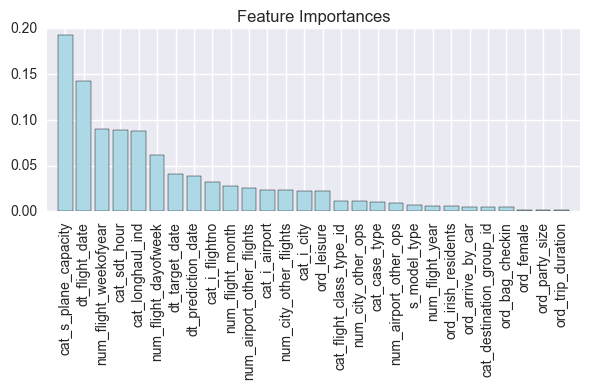

In [14]:
from sklearn.ensemble import RandomForestRegressor

feat_labels = df.columns[0:]

forest = RandomForestRegressor(n_estimators=10,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X, target)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))



plt.title('Feature Importances')
plt.bar(range(X.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

###### Feature selector that removes all low-variance features.
This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [15]:
from sklearn.feature_selection import VarianceThreshold, f_regression, SelectKBest

#Find all features with more than 90% variance in values.
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = df.columns[vt.variances_ > threshold * (1-threshold)]
# select the top 20 

feat_var_threshold[0:20]

Index(['dt_prediction_date', 'dt_target_date', 's_model_type', 'cat_case_type',
       'cat_i_flightno', 'dt_flight_date', 'num_flight_year',
       'num_flight_month', 'num_flight_weekofyear', 'num_flight_dayofweek',
       'cat_sdt_hour', 'cat_i_airport', 'cat_i_city',
       'cat_destination_group_id', 'num_airport_other_ops',
       'num_airport_other_flights', 'num_city_other_ops',
       'num_city_other_flights', 'cat_s_plane_capacity',
       'cat_flight_class_type_id'],
      dtype='object')